<a href="https://colab.research.google.com/github/FathimaNazarudeen/Advanced-Computing-Lab/blob/main/Experiment%205/pca_knn_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
file=pd.read_csv("/content/BreastCancer.csv")
x=file[["Cl.thickness","Cell.size","Cell.shape","Marg.adhesion",	"Epith.c.size","Bare.nuclei",	"Bl.cromatin","Normal.nucleoli","Mitoses"]]

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x["Bare.nuclei"]=le.fit_transform(x["Bare.nuclei"])
x=x.fillna(0)
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,5,1,1,1,2,0,3,1,1
1,5,4,4,5,7,9,3,2,1
2,3,1,1,1,2,1,3,1,1
3,6,8,8,1,3,3,3,7,1
4,4,1,1,3,2,0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1,1
695,2,1,1,1,2,0,1,1,1
696,5,10,10,3,7,2,8,10,2
697,4,8,6,4,3,3,10,6,1


In [7]:
from sklearn.decomposition import PCA
pcamodel=PCA(n_components=2)
principalcomponents=pcamodel.fit_transform(x)
newx=pd.DataFrame(data=principalcomponents,columns=["PC1","PC2"])

In [8]:
xaxis=newx["PC1"]
yaxis=newx["PC2"]
newx

,PC1,PC2
0,-4.524871,0.511702
1,4.778532,-4.703543
2,-4.673811,-0.479308
3,5.063234,3.100018
4,-4.161498,0.432835
...,...,...
694,-5.009017,-0.359419
695,-5.998254,0.237887
696,10.221519,6.803016
697,6.362479,2.505626


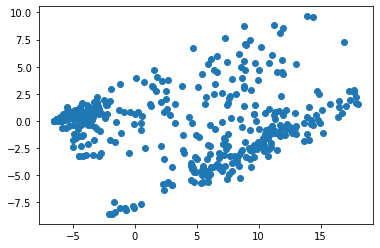

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(xaxis,yaxis)

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(newx)

In [11]:
centers=kmeans.cluster_centers_
labels= kmeans.labels_
labels

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,

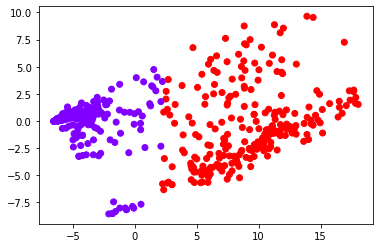

In [12]:
plt.scatter(xaxis,yaxis,c=labels,cmap='rainbow')